# P4 Example Exam

In [2]:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
from Resources.Functions import *  # type: ignore                                     # Custom functions
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

In [288]:
def accuracyf(matrix):
    return np.diag(matrix).sum() / matrix.sum().sum()

def precisionf(matrix):
    results = []
    n = matrix.shape[1]
    for i in range(0, n):
        TP = matrix.values[i][i]
        results = results + [TP / matrix.values[:, i].sum()]
    return results

def recallf(matrix):
    results = []
    n = matrix.shape[0]
    for i in range(0, n):
        TP = matrix.values[i][i]
        results = results + [TP / matrix.values[i, :].sum()]
    return results

def f_measuref(matrix, beta):
    precisionarray = precisionf(matrix)
    recallarray = recallf(matrix)
    fmeasure = []
    n = len(precisionarray)
    for i in range(0, n):
        p = precisionarray[i]
        r = recallarray[i]
        fmeasure = fmeasure + [((beta * beta + 1) * p * r) / (beta * beta * p + r)]
    return fmeasure

def evaluate_classifier(matrix, beta=1, threshold=0.9):
    warnings.filterwarnings("ignore")  # Ignoring future dependency warning.

    TP = np.diag(matrix).sum()
    TN = np.sum(np.diag(matrix)) - TP

    accuracy = (TP + TN) / matrix.sum().sum()

    n = matrix.shape[1]
    precision = [np.diag(matrix)[i] / np.sum(matrix.iloc[i, :]) if np.sum(
        matrix.iloc[i, :]) > 0 else 0 for i in range(0, n)]

    n = matrix.shape[0]
    recall = [np.diag(matrix)[i] / np.sum(matrix.iloc[:, i]) if np.sum(
        matrix.iloc[:, i]) > 0 else 0 for i in range(0, n)]

    f1_score = [((beta ** 2 + 1) * p * r) / ((beta ** 2 * p) + r) if (p + r) > 0 else 0 for p, r in
                zip(precision, recall)]

    if accuracy >= threshold and all(prec >= threshold for prec in precision) and all(
            rec >= threshold for rec in recall) and all(f1 >= threshold for f1 in f1_score):
        print(colored(f"This is a good classifier with a threshold of {threshold * 100}%", outputColor))
    else:
        print(colored(f"This is a bad classifier with a threshold of {threshold * 100}%", outputColor))

    warnings.filterwarnings("default")  # Ignoring future dependency warning.
    
def plot_rocf(y_true, y_score, title='ROC Curve', **kwargs):
    from sklearn.metrics import roc_curve, roc_auc_score

    if 'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = roc_auc_score(y_true, y_score)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')

    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    ax.scatter(fpr[optimal_idx], tpr[optimal_idx],
               label='optimal cutoff {:.2f} on ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx],
                                                                       tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')

    ax.legend(loc='lower right')
    plt.show()

def categorize_variables(df):
    independentVars = []
    dependentVars = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            independentVars.append(col)
        elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(
                df[col]) or pd.api.types.is_bool_dtype(df[col]):
            dependentVars.append(col)
    warnings.filterwarnings("ignore")
    return independentVars, dependentVars

def calculate_confusion_metrics(matrix, class_label):
    class_index = matrix.columns.get_loc(class_label)
    TP = matrix.iloc[class_index, class_index]
    FP = matrix.iloc[:, class_index].sum() - TP
    FN = matrix.iloc[class_index, :].sum() - TP
    total_sum = matrix.values.sum()
    TN = total_sum - (TP + FP + FN)
    
    return TP, TN, FP, FN

def positiveratesf(matrix):
    if (matrix.shape[0] == 2) & (matrix.shape[1] == 2):
        TPR = matrix.values[0][0] / matrix.values[0, :].sum()
        print(colored(f"TPR: {TPR}", outputColor))
        FPR = matrix.values[1][0] / matrix.values[1, :].sum()
        print(colored(f"FPR: {FPR}", outputColor))
    return

def find_best_threshold(y_true, y_score, beta=1):
    from sklearn.metrics import precision_recall_curve

    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    f1_score = [(beta ** 2 + 1) * p * r / ((beta ** 2 * p) + r) if (p != 0 and r != 0) else 0 for p, r in
                zip(precision, recall)]
    optimal_idx = f1_score.index(max(f1_score))
    return thresholds[optimal_idx]

## Exercises Discriminant Analysis (Week 1)

### Question 1:
- Can you predict the writing hand of the next student based on the specified height (`182`), pieces of fruit (`2`), shoe size (`44`), distance to KdG (`22`)? Only use students who have specified Left or Right as their writing hand.
- Draw up a confusion matrix based on the predicted and effective values for the data you used to perform the discriminant analysis.
- Calculate the usual evaluation metrics for a binary classifier [`Rechts`, `Links`].
- Draw the ROC curve. If applicable, explain why the ROC curve is not drawn.
- What is the accuracy of the discriminant analysis where height and shoe size predict the number of brothers and sisters?

**Name of Columns**: `gapminder` `schrijfhand` `schoenmaat` `lengte` `bloedgroep` `resus` `siblings` `Samenzweringen` `rijbewijs` `domicilie in Antwerpen` `afstudeerrichting` `vrijetijdsbesteding` `uren wiskunde` `informatica` `belangrijk` `uren buiten schooluren` `afstand tot KdG` `vervoersmiddel` `klimaatopwarming` `zakgeld` `stukken fruit` `fruitvoorkeur` `besturingssysteem` `belangrijkste app` `M1 - stelen` `M2 - team` `M3 - beschermen` `M4 - voorbeeld` `M5 - embryo` `M6 - vrijheid` `mascotte` `zwaarste vak` `boeienste vak` `studiepunt`

In [289]:
# Load in data and filter data
data = pd.read_csv('../Data/Data1.csv', delimiter=';', decimal=',')
data = data[(data['schrijfhand'] == 'Rechts') | (data['schrijfhand'] == 'Links')] # Drop row if not equal to right or left-handed
display(data.head())

,gapminder,schrijfhand,schoenmaat,lengte,bloedgroep,resus,siblings,Samenzweringen,rijbewijs,domicilie in Antwerpen,...,M1 - stelen,M2 - team,M3 - beschermen,M4 - voorbeeld,M5 - embryo,M6 - vrijheid,mascotte,zwaarste vak,boeienste vak,studiepunt
0,7/18,Rechts,43.0,184,O,positief,5,De tsunami van 2004 in de Indische Oceaan was ...,Categorie B: Wagens.,"buiten de stad (een dorp, een gehucht, het pla...",...,7,2,8,6,5,4.0,"1=Bever,2=Wasbeer,3=Otter,4=Wolf,5=Poema,6=Pan...",Management 1,Data science 1,16-20 uren
1,3/18,Rechts,42.0,163,Weet ik niet,Weet ik niet,1,Prinses Diana kwam niet per ongeluk om het leven,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,10,5,10,6,7,3.0,"1=Bever,2=Wolf,3=Bizon,4=Otter,5=Panter,6=Poem...",Management 1,Computersystemen 1,<= 10 uren
2,12/18,Rechts,45.0,183,AB,positief,2,Prinses Diana kwam niet per ongeluk om het lev...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,6,3,7,7,10,6.0,"1=Bruine beer,2=Poema,3=Panter,4=Wolf,5=Vos,6=...",Management 1,Programmeren 1 - Java,16-20 uren
3,5/18,Rechts,44.0,175,A,positief,2,De wereld wordt eigenlijk gecontroleerd door e...,Categorie AM: Bromfietsen met een maximumsnelh...,in een stad,...,9,10,10,10,10,0.0,"1=Wasbeer,2=Wolf,3=Bruine beer,4=Das,5=Vos,6=B...",Management 1,Data science 1,<= 10 uren
4,6/18,Rechts,43.0,173,B,positief,3,De wereld wordt eigenlijk gecontroleerd door e...,Categorie B: Wagens.,in een stad,...,10,6,10,7,7,2.0,"1=Wolf,2=Vos,3=Bruine beer,4=Bizon,5=Panter,6=...",Management 1,Data science 1,<= 10 uren


In [290]:
# Create linear discriminant analysis model
independentVariables = data[['lengte', 'stukken fruit', 'schoenmaat', 'afstand tot KdG']] # Independent variables
dependentVariable = data['schrijfhand']                                                   # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Predict with test data
testStudent = pd.DataFrame(data={'lengte':[182], 'stukken fruit':[2], 'schoenmaat':[44], 'afstand tot KdG':[22]})
print(colored(f"If you assume that the student has. The following attributes:", outputColor))
for column in testStudent.columns:
    print(colored(f"\t- {column}: {testStudent[column].values}", outputColor))
print(colored(f"Then the probability lies between {lda.predict_proba(testStudent)} that he is {lda.predict(testStudent)} handed.", outputColor))

If you assume that the student has. The following attributes:
	- lengte: [182]
	- stukken fruit: [2]
	- schoenmaat: [44]
	- afstand tot KdG: [22]
Then the probability lies between [[0.09459903 0.90540097]] that he is ['Rechts'] handed.


In [291]:
# Create confusion matrix
predicted = pd.Series(lda.predict(independentVariables), name='Predicted')
actual = dependentVariable.rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='All', margins_name='Total')
display(confusion_matrix)

Predicted,Links,Rechts,Total
actual,,,
Links,1,13,14
Rechts,1,74,75
Total,2,87,89


In [292]:
# Evaluating model
accuracy = accuracyf(confusion_matrix)

precision_left = precisionf(confusion_matrix)[0]
precision_right = precisionf(confusion_matrix)[1]

recall_left = recallf(confusion_matrix)[0]
recall_right = recallf(confusion_matrix)[1]

f1_left = f_measuref(confusion_matrix, 1)[0]
f1_right = f_measuref(confusion_matrix, 1)[1]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the binary classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the binary classifier for left-handed is: {round(precision_left, 2) * 100}%", outputColor))
print(colored(f"The precision of the binary classifier for right-handed is: {round(precision_right, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for left-handed is: {round(recall_left, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for right-handed is: {round(recall_right, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for left-handed is: {round(f1_left, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for right-handed is: {round(f1_right, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix, 1, 0.9)

The accuracy of the binary classifier is: 46.0%

The precision of the binary classifier for left-handed is: 25.0%
The precision of the binary classifier for right-handed is: 43.0%

The recall of the binary classifier for left-handed is: 4.0%
The recall of the binary classifier for right-handed is: 49.0%

The F1-measure of the binary classifier for left-handed is: 6.0%
The F1-measure of the binary classifier for right-handed is: 46.0%

This is a bad classifier with a threshold of 90.0%


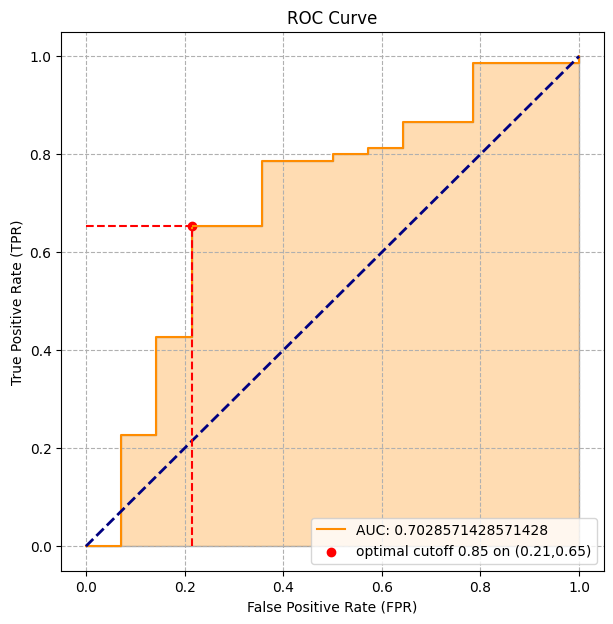

In [293]:
# Create a ROC (Receiver Operator Characteristic Curve) diagram.
y_true = pd.get_dummies(data['schrijfhand'])['Rechts']
y_score = pd.Series(lda.predict_proba(independentVariables)[:, 1])
plot_rocf(y_true, y_score, title='ROC Curve')

In [294]:
# Create linear discriminant analysis model
independentVariables = data[['lengte', 'schoenmaat']] # Independent variables
dependentVariable = data['siblings']                  # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Create confusion matrix
predicted = pd.Series(lda.predict(independentVariables), name='Predicted')
actual = dependentVariable.rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='All', margins_name='Total')

# Evaluating model
accuracy = accuracyf(confusion_matrix)
print(colored(f"What is the accuracy when we use two independent variables, length and shoe size to predict the amount of siblings: {round(accuracy, 2) * 100}%", outputColor))

What is the accuracy when we use two independent variables, length and shoe size to predict the amount of siblings: 10.0%


### Question 2:
- Find the dataset `/Data/Bordeaux.csv` and place it in a data frame.
    - Apply a discriminant analysis to this data set with `quality` as the dependent variable and `temperature`, `sun`, `heat` and `rain` as the independent variables.
    - How many dimensions does the discriminant analysis have?
    - Plot the results of the discriminant analysis. What is visualized here?
    - Apply the predict command briefly to the original data. What percentage of the wines receive the same label via the discriminant analysis as observed?

In [295]:
# Load in data and filter data
bordeaux = pd.read_csv('../Data/Bordeaux.csv', delimiter=';')
display(bordeaux.head())

,year,temperature,sun,heat,rain,quality
0,1924,3064,1201,10,361,medium
1,1925,3000,1053,11,338,bad
2,1926,3155,1133,19,393,medium
3,1927,3085,970,4,467,bad
4,1928,3245,1258,36,294,good


In [296]:
# Create linear discriminant analysis model
independentVariables = bordeaux[['temperature', 'sun', 'heat', 'rain']] # Independent variables
dependentVariable = bordeaux['quality']                                 # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Show some information about the discriminant analysis
print(colored(f"There are {(len(dependentVariable.unique()))-1} dimensions dimensions and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables.", outputColor))

There are 2 dimensions dimensions and there are 3 different possibilities for the dependent variable and also, there are 4 independent variables.


The plot visualizes the results of the discriminant analysis. So we can easily see the different quality levels of the wines.


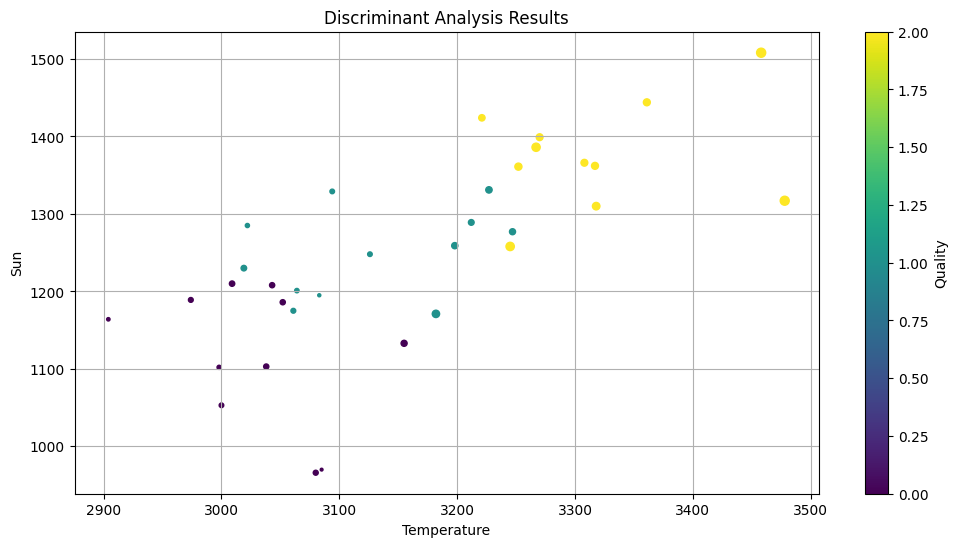

In [297]:
# Visualize the results of the discriminant analysis (quality of the wines)
quality_mapping = {'bad': 0, 'medium': 1, 'good': 2}
bordeaux['quality_code'] = bordeaux['quality'].map(quality_mapping)
dependentVariable_code = bordeaux['quality_code']

lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable_code)

print(colored(f"The plot visualizes the results of the discriminant analysis. So we can easily see the different quality levels of the wines.", outputColor))

plt.figure(figsize=(12, 6))
plt.scatter(independentVariables['temperature'], independentVariables['sun'], independentVariables['heat'], c=lda.predict(independentVariables), cmap='viridis')
plt.colorbar(label='Quality')
plt.xlabel('Temperature')
plt.ylabel('Sun')
plt.title('Discriminant Analysis Results')
plt.grid(True)
plt.show()

In [298]:
# Create linear discriminant analysis model
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Evaluating model
predicted = lda.predict(independentVariables)
accuracy = np.mean(predicted == dependentVariable)

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the discriminant analysis model is: {round(accuracy, 2) * 100}%\n", outputColor))

The accuracy of the discriminant analysis model is: 79.0%



### Question 3:
- Find the dataset `/Data/Birthwt.csv` and place it in a data frame.
    - Analyze the type of data in this dataset.
    - Which columns can be used as dependent variables for a discriminant analysis?
    - Which columns can be used as independent variables for a discriminant analysis?
    - Apply a discriminant analysis to this data set (using your choices above).
    - How many dimensions does the discriminant analysis have?
    - Plot the results of the discriminant analysis.

**Name of Columns & Meaning**:
- `low`: Indicator of birth weight less than 2.5 kg
- `age`: Mother's age in years
- `lwt`: Mother's weight in pounds at last menstrual period
- `race`: Mother's race (1 = white, 2 = black, 3 = other)
- `smoke`: Smoking status during pregnancy (1 = yes, 0 = no)
- `ptl`: Number of previous premature labors
- `ht`: History of hypertension (1 = yes, 0 = no)
- `ui`: Presence of uterine irritability (1 = yes, 0 = no)
- `ftv`: Number of physician visits during the first trimester
- `bwt`: Birth weight in grams

In [299]:
# Load in data and filter data
birthwt = pd.read_csv('../Data/Birthwt.csv', delimiter=';')
display(birthwt.head())

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
0,0,19,182,2,0,0,0,1,0,2523
1,0,33,155,3,0,0,0,0,3,2551
2,0,20,105,1,1,0,0,0,1,2557
3,0,21,108,1,1,0,0,1,2,2594
4,0,18,107,1,1,0,0,1,0,2600


In [300]:
# Analyze data types
df_info = pd.DataFrame({'Column Name': birthwt.columns, 'Data Type': birthwt.dtypes})
display(df_info.T)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
Column Name,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
Data Type,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


In [301]:
# Determine which columns are suitable for dependent variables or independent variables categorization
independentVariables, dependentVariables = categorize_variables(birthwt)

print(colored(f"The independent variables are: {independentVariables}", outputColor))
print(colored(f"The dependent variables are: {dependentVariables}", outputColor))

print(colored(f"\nAll variables are dependent variables, therefore you can choose which one you want to make independent for prediction purposes.", outputColor))
print(colored(f"We will choose as dependent variable the 'smoke' column.", outputColor))
print(colored(f"We will choose as independent variables 'age', 'lwt' and 'bwt' because these are not correlated (Derived from).", outputColor))

The independent variables are: ['low', 'age', 'lwt', 'race', 'smoke', 'ptl', 'ht', 'ui', 'ftv', 'bwt']
The dependent variables are: []

All variables are dependent variables, therefore you can choose which one you want to make independent for prediction purposes.
We will choose as dependent variable the 'smoke' column.
We will choose as independent variables 'age', 'lwt' and 'bwt' because these are not correlated (Derived from).


In [302]:
# Create linear discriminant analysis model
independentVariables = birthwt[['age', 'lwt', 'bwt']] # Independent variables
dependentVariable = birthwt['smoke']                  # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Show some information about the discriminant analysis
print(colored(f"There is {(len(dependentVariable.unique()))-1} dimension and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables.", outputColor))

There is 1 dimension and there are 2 different possibilities for the dependent variable and also, there are 3 independent variables.


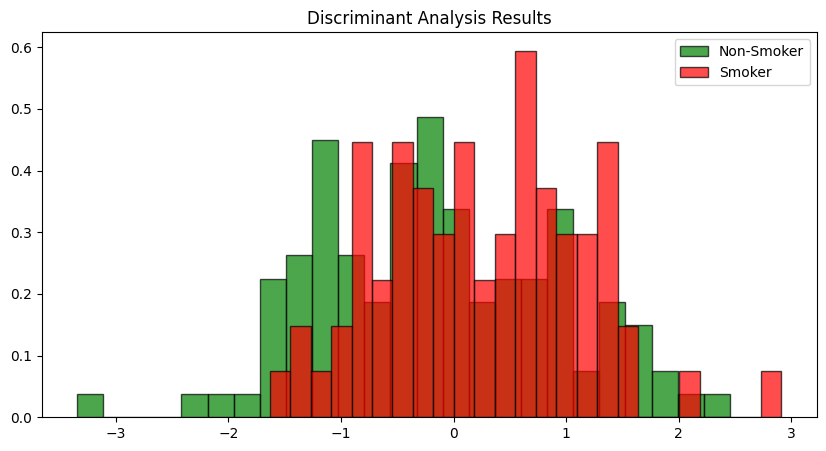

In [303]:
# Visualize the results of the discriminant analysis (smoking status during pregnancy)
birthwt["LD1"] = lda.transform(independentVariables)[:, 0]
plt.figure(figsize=(10, 5))
birthwt['LD1'][birthwt['smoke'] == 0].hist(bins=25, density=True, edgecolor='black', color='green', alpha=0.7, label='Non-Smoker')
birthwt['LD1'][birthwt['smoke'] == 1].hist(bins=25, density=True, edgecolor='black', color='red', alpha=0.7, label='Smoker')
plt.title('Discriminant Analysis Results')
plt.legend()
plt.grid(False)
plt.show()

### Question 4:
- Find the dataset `/Data/Cars93.csv` and place it in a data frame.
    - Analyze the type of data in this dataset.
    - Split the data set into two: 
        - The first `90` rows as a `learning data set` for why you are going to apply a discriminant analysis.
        - The last `3` rows to `check` whether the obtained discriminant analysis places these cars in the correct class places.
    - Which columns can be used as dependent variables for a discriminant analysis?
    - Which columns can be used as independent variables for a discriminant analysis?
    - Apply a discriminant analysis to this data set. Take the `Type` column as the dependent variable and all usable columns as the independent variables.
    - How many dimensions does the discriminant analysis have?
    - Apply the obtained discriminant analysis using the predict command to the last `3` rows of the original data. Will all `3` cars be placed in the correct class?

**Name of Columns & Meaning**:
- `Manufacturer`: Manufacturer of the car
- `Model`: Model of the car
- `Type`: A factor with levels `Small`, `Sporty`, `Compact`, `Midsize`, `Large` and `Van`
- `Min.Price`: Minimum Price (in \$1,000) price of a basic version of the car
- `Price`: Midrange Price (in \$1,000) average of `Min.Price` and `Max.Price`
- `Max.Price`: Maximum Price (in \$1,000) price of `a premium version` of the car
- `MPG.city`: City MPG (miles per US gallon by EPA rating)
- `MPG.highway`: Highway MPG
- `AirBags`: AirBags standard. Factor: `None`, `Driver only`, `Driver` & `Passenger`
- `DriveTrain`: Drive train type: `Real wheel`, `Front wheel` or `4WD` (factor)
- `Cylinders`: Number of cylinders (missing for Mazda RX-7, which has a rotary engine)
- `EngineSize`: Engine size (liters)
- `Horsepower`: Horsepower (maximum)
- `RPM`: RPM (revs per minute at maximum horsepower)
- `Rev.per.mile`: Engine revolutions per mile (in the highest gear)
- `Man.trans.avail`: Is a manual transmission available? Factor with levels `Yes` and `No`
- `Fuel.tank.capacity`: Fuel tank capacity (US gallons)
- `Passengers`: Passenger capacity (persons)

In [304]:
# Load in data and filter data
cars93 = pd.read_csv('../Data/Cars93.csv', delimiter=';', decimal='.')
display(cars93.head())

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [305]:
# Analyze data types
df_info = pd.DataFrame({'Column Name': cars93.columns, 'Data Type': cars93.dtypes})
display(df_info)

,Column Name,Data Type
Manufacturer,Manufacturer,object
Model,Model,object
Type,Type,object
Min.Price,Min.Price,float64
Price,Price,float64
Max.Price,Max.Price,float64
MPG.city,MPG.city,int64
MPG.highway,MPG.highway,int64
AirBags,AirBags,object
DriveTrain,DriveTrain,object


In [306]:
# Splitting data
cars93 = cars93.dropna()
learningData = cars93.iloc[:50]         # The 1st 50 rows.
validationData = cars93.iloc[-4:]       # The last 4 rows.

# Determine which columns are suitable for dependent variables or independent variables categorization
independentVariables, dependentVariables = categorize_variables(learningData)

print(colored(f"The independent variables are: {independentVariables}\n", outputColor))
print(colored(f"The dependent variables are: {dependentVariables}", outputColor))

The independent variables are: ['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']

The dependent variables are: ['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']


In [307]:
# Create linear discriminant analysis model
independentVariables = learningData[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 
                                     'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 
                                     'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']]  # Independent variables
dependentVariable = learningData['Type']                                                                                # Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

# Show some information about the discriminant analysis
print(colored(f"There are {(len(dependentVariable.unique()))-1} dimensions and there are {len(dependentVariable.unique())} different possibilities for the dependent variable and also, there are {len(independentVariables.columns)} independent variables.", outputColor))

There are 4 dimensions and there are 5 different possibilities for the dependent variable and also, there are 18 independent variables.


In [308]:
# Predict with validation data
predicted = lda.predict(validationData[['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway', 'EngineSize', 
                                     'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Passengers', 'Length', 
                                     'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight']])

print(colored(f"Predicted values: {predicted}", outputColor))
print(colored(f"Actual values: {validationData['Type'].values}", outputColor))

# Evaluating model
correct = np.mean(predicted == validationData['Type'])
print(colored(f"\nThe percentage of cars that are correctly classified is: {round(correct, 2) * 100}%", outputColor))

predicted = lda.predict(independentVariables)
accuracy = np.mean(predicted == dependentVariable)

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the discriminant analysis model is: {round(accuracy, 2) * 100}%\n", outputColor))

Predicted values: ['Sporty' 'Compact' 'Compact' 'Midsize']
Actual values: ['Sporty' 'Midsize' 'Compact' 'Midsize']

The percentage of cars that are correctly classified is: 75.0%
The accuracy of the discriminant analysis model is: 94.0%



## Exercises Evaluation Metrics (Week 2)

### Question 1:
- In the table below you will find the confusion matrix of a binary classifier.

|            | Predicted YES | Predicted NO | Total |
|------------|---------------|--------------|-------|
| Actual YES | 100           | 5            | 105   |
| Actual NO  | 10            | 50           | 60    |
| Total      | 110           | 55           | 165   |

- **NOTE**: 
    - YES = Positive
    - NO = Negative


- Now answer the following questions:
     - What are the values for TP, TN, FP, FN?
     - Now calculate the accuracy, precision and recall.
     - Calculate the F1 measures and F1.5 measures.
     - What is the TPR and FPR? Compare with your recall. What do you determine?

In [309]:
# Load in data
confusion_matrix1 = pd.DataFrame(data=[[100, 5], [10, 50]], 
                                 columns=['Predicted YES', 'Predicted NO'], 
                                 index=['Actual YES', 'Actual NO'])
display(confusion_matrix1)

,Predicted YES,Predicted NO
Actual YES,100,5
Actual NO,10,50


In [310]:
# Calculating the TP, TN, FP en FN.
TP1, TN1, FP1, FN1 = calculate_confusion_metrics(confusion_matrix1, 'Predicted YES')

# True Positives (TP): The number of correct positive predictions.
print(colored(f"True Positives (TP): {TP1}", outputColor))

# True Negatives (TN): The number of correct negative predictions.
print(colored(f"True Negatives (TN): {TN1}", outputColor))

# False Positives (FP): The number of incorrect positive predictions.
print(colored(f"False Positives (FP): {FP1}", outputColor))

# False Negatives (FN): The number of incorrect negative predictions.
print(colored(f"False Negatives (FN): {FN1}", outputColor))

True Positives (TP): 100
True Negatives (TN): 50
False Positives (FP): 10
False Negatives (FN): 5


In [311]:
# Evaluating model
accuracy = accuracyf(confusion_matrix1)

precision_yes = precisionf(confusion_matrix1)[0]
precision_no = precisionf(confusion_matrix1)[1]

recall_yes = recallf(confusion_matrix1)[0]
recall_no = recallf(confusion_matrix1)[1]

f1_yes = f_measuref(confusion_matrix1, 1)[0]
f1_no = f_measuref(confusion_matrix1, 1)[1]

f15_yes = f_measuref(confusion_matrix1, 1.5)[0]
f15_no = f_measuref(confusion_matrix1, 1.5)[1]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for yes is: {round(precision_yes, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for no is: {round(precision_no, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for yes is: {round(recall_yes, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for no is: {round(recall_no, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for yes is: {round(f1_yes, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for no is: {round(f1_no, 2) * 100}%\n", outputColor))

print(colored(f"The F1.5-measure of the binary classifier for yes is: {round(f15_yes, 2) * 100}%", outputColor))
print(colored(f"The F1.5-measure of the binary classifier for no is: {round(f15_no, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix1, 1, 0.9)

The accuracy of the classifier is: 91.0%

The precision of the classifier for yes is: 91.0%
The precision of the classifier for no is: 91.0%

The recall of the binary classifier for yes is: 95.0%
The recall of the binary classifier for no is: 83.0%

The F1-measure of the binary classifier for yes is: 93.0%
The F1-measure of the binary classifier for no is: 87.0%

The F1.5-measure of the binary classifier for yes is: 94.0%
The F1.5-measure of the binary classifier for no is: 86.0%

This is a bad classifier with a threshold of 90.0%


In [312]:
# Calculating the TPR, FPR and comparing it with the recall.
positiveratesf(confusion_matrix1)
print(colored(f"Recall Yes: {recall_yes}", outputColor))
print(colored(f"'TPF' is equal to the 'recall_yes'", outputColor))

TPR: 0.9523809523809523
FPR: 0.16666666666666666
Recall Yes: 0.9523809523809523
'TPF' is equal to the 'recall_yes'


### Question 2:
- In the table below you will find the confusion matrix of a binary classifier.

|            | Predicted YES | Predicted NO | Total |
|------------|---------------|--------------|-------|
| Actual A   | 100           | 0            | 100   |
| Actual B   | 50            | 5            | 55    |
| Total      | 150           | 5            | 155   |

- **NOTE**: 
    - YES = Positive
    - NO = Negative


- Now answer the following questions:
     - What are the values for TP, TN, FP, FN?
     - Calculate the accuracy, precision and recall, and F1.
     - Is this a good classifier?

In [313]:
# Load in data
confusion_matrix2 = pd.DataFrame(data=[[100, 0], [50, 5]], 
                                 columns=['Predicted YES', 'Predicted NO'], 
                                 index=['Actual A', 'Actual B'])
display(confusion_matrix2)

,Predicted YES,Predicted NO
Actual A,100,0
Actual B,50,5


In [314]:
# Calculating the TP, TN, FP en FN.
TP1, TN1, FP1, FN1 = calculate_confusion_metrics(confusion_matrix2, 'Predicted YES')

# True Positives (TP): The number of correct positive predictions.
print(colored(f"True Positives (TP): {TP1}", outputColor))

# True Negatives (TN): The number of correct negative predictions.
print(colored(f"True Negatives (TN): {TN1}", outputColor))

# False Positives (FP): The number of incorrect positive predictions.
print(colored(f"False Positives (FP): {FP1}", outputColor))

# False Negatives (FN): The number of incorrect negative predictions.
print(colored(f"False Negatives (FN): {FN1}", outputColor))

True Positives (TP): 100
True Negatives (TN): 5
False Positives (FP): 50
False Negatives (FN): 0


In [315]:
# Evaluating model
accuracy = accuracyf(confusion_matrix2)

precision_yes = precisionf(confusion_matrix2)[0]
precision_no = precisionf(confusion_matrix2)[1]

recall_yes = recallf(confusion_matrix2)[0]
recall_no = recallf(confusion_matrix2)[1]

f1_yes = f_measuref(confusion_matrix2, 1)[0]
f1_no = f_measuref(confusion_matrix2, 1)[1]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for yes is: {round(precision_yes, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for no is: {round(precision_no, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for yes is: {round(recall_yes, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for no is: {round(recall_no, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for yes is: {round(f1_yes, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for no is: {round(f1_no, 2) * 100}%\n", outputColor))

evaluate_classifier(confusion_matrix2, 1, 0.9)

The accuracy of the classifier is: 68.0%

The precision of the classifier for yes is: 67.0%
The precision of the classifier for no is: 100.0%

The recall of the binary classifier for yes is: 100.0%
The recall of the binary classifier for no is: 9.0%

The F1-measure of the binary classifier for yes is: 80.0%
The F1-measure of the binary classifier for no is: 17.0%

This is a bad classifier with a threshold of 90.0%


### Question 3:
- In the table below you will find the confusion matrix of a multiclass classifier.

|            | Asfalt | Beton | Gras | Boom | Gebouw | Total |
|------------|--------|-------|------|------|--------|-------|
| Asfalt     | 2385   | 0     | 0    | 0    | 12     | 2397  |
| Beton      | 4      | 332   | 1    | 0    | 0      | 337   |
| Gras       | 0      | 0     | 908  | 0    | 0      | 908   |
| Boom       | 1      | 0     | 8    | 1084 | 6      | 1099  |
| Gebouw     | 4      | 1     | 0    | 9    | 2053   | 2067  |
| Total      | 2394   | 333   | 917  | 1093 | 2071   | 6808  |

- Beantwoord nu de volgende vragen:
    - What are the values for TP, FP, FN for the `Gras` class?
    - Now calculate the accuracy, precision and recall per class with these functions.
    - Is this a good classifier?


In [316]:
# Load in data
confusion_matrix3 = pd.DataFrame(data=[[2385, 0, 0, 0, 12], [4, 332, 1, 0, 0], [0, 0, 908, 0, 0], [1, 0, 8, 1084, 6], [4, 1, 0, 9, 2053]], 
                                 columns=['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw'], 
                                 index=['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw'])
display(confusion_matrix3)

,Asfalt,Beton,Gras,Boom,Gebouw
Asfalt,2385,0,0,0,12
Beton,4,332,1,0,0
Gras,0,0,908,0,0
Boom,1,0,8,1084,6
Gebouw,4,1,0,9,2053


In [317]:
# Calculating the TP, TN, FP en FN.
TP1, TN1, FP1, FN1 = calculate_confusion_metrics(confusion_matrix3, 'Gras')

# True Positives (TP): The number of correct positive predictions.
print(colored(f"True Positives (TP): {TP1}", outputColor))

# False Positives (FP): The number of incorrect positive predictions.
print(colored(f"False Positives (FP): {FP1}", outputColor))

# False Negatives (FN): The number of incorrect negative predictions.
print(colored(f"False Negatives (FN): {FN1}", outputColor))

True Positives (TP): 908
False Positives (FP): 9
False Negatives (FN): 0


In [318]:
# Evaluating model
accuracy = accuracyf(confusion_matrix3)

precision_asfalt = precisionf(confusion_matrix3)[0]
precision_beton = precisionf(confusion_matrix3)[1]
precision_gras = precisionf(confusion_matrix3)[2]
precision_boom = precisionf(confusion_matrix3)[3]
precision_gebouw = precisionf(confusion_matrix3)[4]

recall_asfalt = recallf(confusion_matrix3)[0]
recall_beton = recallf(confusion_matrix3)[1]
recall_gras = recallf(confusion_matrix3)[2]
recall_boom = recallf(confusion_matrix3)[3]
recall_gebouw = recallf(confusion_matrix3)[4]

f1_asfalt = f_measuref(confusion_matrix3, 1)[0]
f1_beton = f_measuref(confusion_matrix3, 1)[1]
f1_gras = f_measuref(confusion_matrix3, 1)[2]
f1_boom = f_measuref(confusion_matrix3, 1)[3]
f1_gebouw = f_measuref(confusion_matrix3, 1)[4]

# Accuracy: The sum of all correct predictions divided by the total sum.
print(colored(f"The accuracy of the classifier is: {round(accuracy, 2) * 100}%\n", outputColor))

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for asfalt is: {round(precision_asfalt, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for beton is: {round(precision_beton, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for gras is: {round(precision_gras, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for boom is: {round(precision_boom, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for gebouw is: {round(precision_gebouw, 2) * 100}%\n", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the binary classifier for asfalt is: {round(recall_asfalt, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for beton is: {round(recall_beton, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for gras is: {round(recall_gras, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for boom is: {round(recall_boom, 2) * 100}%", outputColor))
print(colored(f"The recall of the binary classifier for gebouw is: {round(recall_gebouw, 2) * 100}%\n", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the binary classifier for asfalt is: {round(f1_asfalt, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for beton is: {round(f1_beton, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for gras is: {round(f1_gras, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for boom is: {round(f1_boom, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the binary classifier for gebouw is: {round(f1_gebouw, 2) * 100}%\n", outputColor))

The accuracy of the classifier is: 99.0%

The precision of the classifier for asfalt is: 100.0%
The precision of the classifier for beton is: 100.0%
The precision of the classifier for gras is: 99.0%
The precision of the classifier for boom is: 99.0%
The precision of the classifier for gebouw is: 99.0%

The recall of the binary classifier for asfalt is: 99.0%
The recall of the binary classifier for beton is: 99.0%
The recall of the binary classifier for gras is: 100.0%
The recall of the binary classifier for boom is: 99.0%
The recall of the binary classifier for gebouw is: 99.0%

The F1-measure of the binary classifier for asfalt is: 100.0%
The F1-measure of the binary classifier for beton is: 99.0%
The F1-measure of the binary classifier for gras is: 100.0%
The F1-measure of the binary classifier for boom is: 99.0%
The F1-measure of the binary classifier for gebouw is: 99.0%



In [319]:
evaluate_classifier(confusion_matrix3, 1, 0.9)

This is a good classifier with a threshold of 90.0%


### Question 4:
- Read the data in the file `..\Data\Simpsons_roc1` & `..\Data\Simpsons_roc2`. Do you notice any differences?
     - Use the `plot_roc` function to draw the ROC curve.
     - What is the best threshold value?
     - What is the AUC? What does it mean?
     - Apply the found threshold value to the `y_score` column (this column contains the results of a neural network predict_proba function) to create a new predicted column.


In [320]:
from IPython.display import display, HTML

# Load in data and filter data
simpsons_roc1 = pd.read_csv('../Data/Simpsons_roc1.csv', delimiter=',', decimal='.')
simpsons_roc2 = pd.read_csv('../Data/Simpsons_roc2.csv', delimiter=',', decimal='.')

# Create HTML code
combined_html = f"""
<table>
    <tr>
        <p>----------Simpsons Roc 1--------------------Simpsons Roc 2----------</p>
        <td>{simpsons_roc1.to_html()}</td>
        <td>{simpsons_roc2.to_html()}</td>
    </tr>
</table>
"""
print(colored(f"They are practically the same.", outputColor))
display(HTML(combined_html))

They are practically the same.


,y_true,y_score
0,0,0.001611
1,1,0.568856
2,0,0.224951
3,1,0.678186
4,1,0.780744
5,0,0.030405
6,1,0.431997
7,0,0.346567
8,0,0.102228
,y_true,y_score


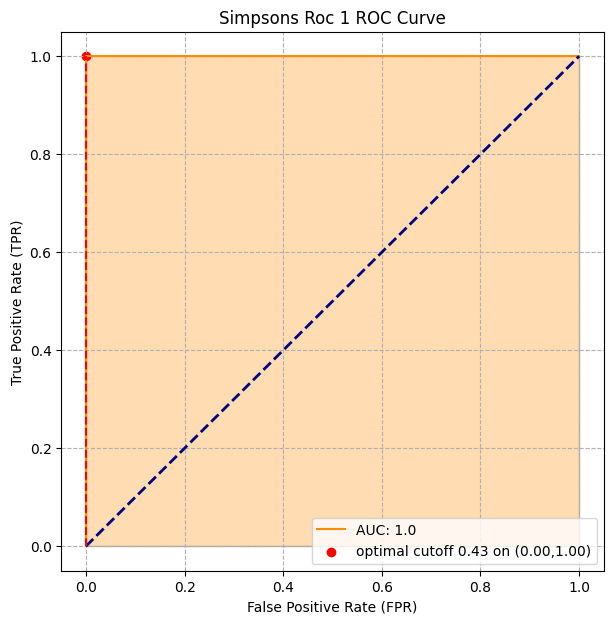

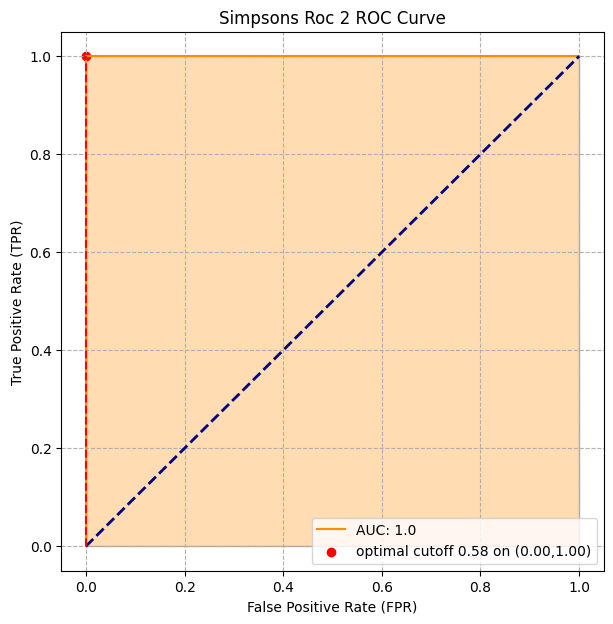

In [321]:
# Plot ROC curve for Simpsons Roc 1 & 2
plot_rocf(y_true=simpsons_roc1['y_true'], y_score=simpsons_roc1['y_score'], title='Simpsons Roc 1 ROC Curve')
plot_rocf(y_true=simpsons_roc2['y_true'], y_score=simpsons_roc2['y_score'], title='Simpsons Roc 2 ROC Curve')

In [322]:
# Calculate Based Threshold Value
best_threshold1 = find_best_threshold(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
best_threshold2 = find_best_threshold(simpsons_roc2['y_true'], simpsons_roc2['y_score'])

# Based Threshold Value: The threshold value that gives the best results for a specific metric.
print(colored(f"The best threshold value for Simpsons Roc 1 is: {round(best_threshold1 * 100, 2)}%", outputColor))
print(colored(f"The best threshold value for Simpsons Roc 2 is: {round(best_threshold2 * 100, 2)}%\n", outputColor))

if best_threshold1 > best_threshold2:
    print(colored(f"Simpsons Roc 1 has a higher threshold value than Simpsons Roc 2.\n", outputColor))
elif best_threshold1 < best_threshold2:
    print(colored(f"Simpsons Roc 2 has a higher threshold value than Simpsons Roc 1.\n", outputColor))
else:
    print(colored(f"The threshold values are the same.\n", outputColor))

# Calculate AUC (Area Under Curve)
auc1 = roc_auc_score(simpsons_roc1['y_true'], simpsons_roc1['y_score'])
auc2 = roc_auc_score(simpsons_roc2['y_true'], simpsons_roc2['y_score'])

# Area Under Curve: If the binary classifier can distinguish the two better, the number is higher.
print(colored(f"The AUC for Simpsons Roc 1 is: {round(auc1, 2)}%", outputColor))
print(colored(f"The AUC for Simpsons Roc 2 is: {round(auc2, 2)}%\n", outputColor))

if auc1 > auc2:
    print(colored(f"Simpsons Roc 1 has a higher AUC value than Simpsons Roc 2.\n", outputColor))
elif auc1 < auc2:
    print(colored(f"Simpsons Roc 2 has a higher AUC value than Simpsons Roc 1.\n", outputColor))
else:
    print(colored(f"The AUC values are the same.\n", outputColor))

The best threshold value for Simpsons Roc 1 is: 43.2%
The best threshold value for Simpsons Roc 2 is: 57.64%

Simpsons Roc 2 has a higher threshold value than Simpsons Roc 1.

The AUC for Simpsons Roc 1 is: 1.0%
The AUC for Simpsons Roc 2 is: 1.0%

The AUC values are the same.



In [323]:
# Apply threshold value to y_score column
simpsons_roc1['y_pred'] = simpsons_roc1['y_score'].apply(lambda x: 1 if x > best_threshold1 else 0)
simpsons_roc2['y_pred'] = simpsons_roc2['y_score'].apply(lambda x: 1 if x > best_threshold2 else 0)

# Calculate accuracy of prediction
accuracy1 = np.mean(simpsons_roc1['y_true'] == simpsons_roc1['y_pred'])
accuracy2 = np.mean(simpsons_roc2['y_true'] == simpsons_roc2['y_pred'])
print(colored(f"The accuracy of the ANN for Simpsons Roc 1 is: {round(accuracy1, 2) * 100}%\n", outputColor))
print(colored(f"The accuracy of the ANN for Simpsons Roc 2 is: {round(accuracy2, 2) * 100}%\n", outputColor))

# Show prediction
combined_html = f"""
<table>
    <tr>
        <p>---------------Simpsons Roc 1-----------------------------------Simpsons Roc 2---------------</p>
        <td>{simpsons_roc1.to_html()}</td>
        <td>{simpsons_roc2.to_html()}</td>
    </tr>
</table>
"""
display(HTML(combined_html))

The accuracy of the ANN for Simpsons Roc 1 is: 89.0%

The accuracy of the ANN for Simpsons Roc 2 is: 89.0%



,y_true,y_score,y_pred
0,0,0.001611,0
1,1,0.568856,1
2,0,0.224951,0
3,1,0.678186,1
4,1,0.780744,1
5,0,0.030405,0
6,1,0.431997,0
7,0,0.346567,0
8,0,0.102228,0
,y_true,y_score,y_pred


### Question 5:
- Two linear discriminant analysis models were built with the dataset infert. The results of the predictions can be found in the files `Education_roc1.csv` and `Education_roc2.csv`.
    - Load both datasets.
    - Use the `plot_roc` function to plot both ROC curves. For both data sets, use column `6-11yrs` as the `y-score` and transform the column `y_true` into 1 for the values `6-11yrs` and a 0 for the other values.
    - What is the best threshold value for each of the ROC curves?
    - Which model do you prefer?

In [324]:
from IPython.display import display, HTML

# Load in data and filter data
education_roc1 = pd.read_csv('../Data/Education_roc1.csv', delimiter=',', decimal='.')
education_roc2 = pd.read_csv('../Data/Education_roc2.csv', delimiter=',', decimal='.')

# Create HTML code
combined_html = f"""
<table>
    <tr>
        <p>--------------------Education Roc 1-------------------------Education Roc 2--------------------</p>
        <td>{education_roc1.head().to_html()}</td>
        <td>{education_roc2.head().to_html()}</td>
    </tr>
</table>
"""
display(HTML(combined_html))

,12+ yrs,6-11yrs,y_true
0,0.337185,0.662815,6-11yrs
1,0.275267,0.724733,6-11yrs
2,0.766077,0.233923,6-11yrs
3,0.468015,0.531985,6-11yrs
4,0.808740,0.191260,6-11yrs
,12+ yrs,6-11yrs,y_true
0,0.0,1.0,6-11yrs
1,0.0,1.0,6-11yrs
2,0.0,1.0,6-11yrs
3,0.0,1.0,6-11yrs


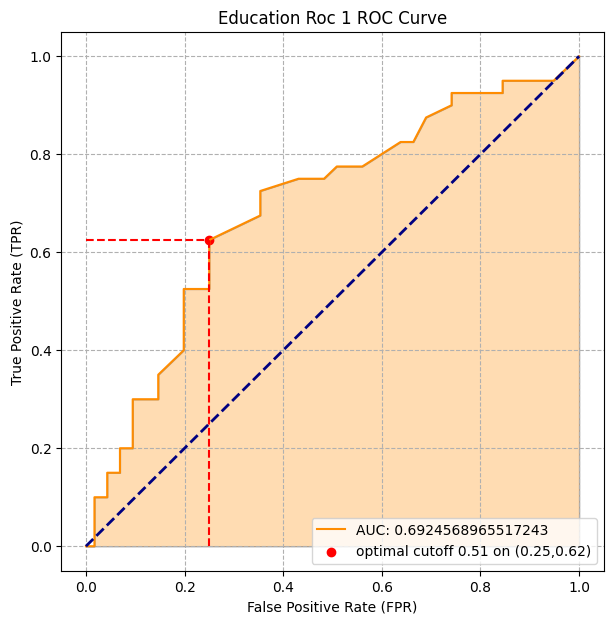

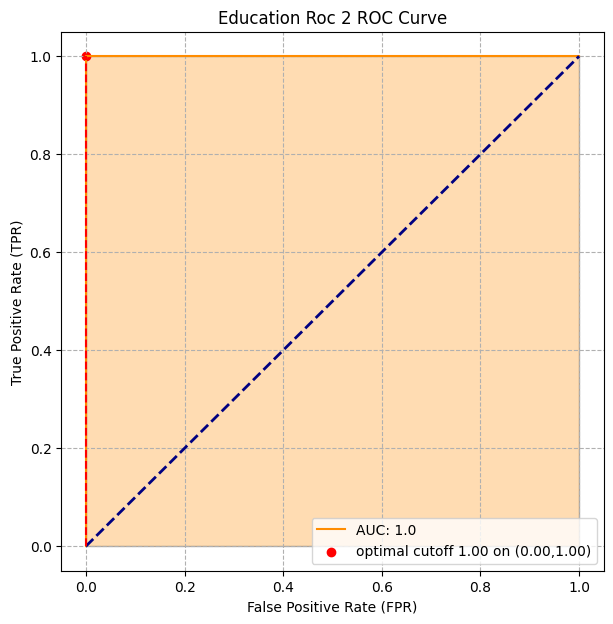

In [325]:
# Transform data set
education_roc1['y_true'] = education_roc1['y_true'].apply(lambda x: 1 if x == '6-11yrs' else 0)
education_roc2['y_true'] = education_roc2['y_true'].apply(lambda x: 1 if x == '6-11yrs' else 0)

# Plot ROC curve for Education Roc 1 & 2
plot_rocf(y_true=education_roc1['y_true'], y_score=education_roc1['6-11yrs'], title='Education Roc 1 ROC Curve')
plot_rocf(y_true=education_roc2['y_true'], y_score=education_roc2['6-11yrs'], title='Education Roc 2 ROC Curve')

In [326]:
# Calculate Based Threshold Value
best_threshold1 = find_best_threshold(education_roc1['y_true'], education_roc1['6-11yrs'])
best_threshold2 = find_best_threshold(education_roc2['y_true'], education_roc2['6-11yrs'])

# Based Threshold Value: The threshold value that gives the best results for a specific metric.
print(colored(f"The best threshold value for Education Roc 1 is: {round(best_threshold1 * 100, 2)}%", outputColor))
print(colored(f"The best threshold value for Education Roc 2 is: {round(best_threshold2 * 100, 2)}%\n", outputColor))

if best_threshold1 > best_threshold2:
    print(colored(f"Education Roc 1 has a higher threshold value than Education Roc 2.\n", outputColor))
elif best_threshold1 < best_threshold2:
    print(colored(f"Education Roc 2 has a higher threshold value than Education Roc 1.\n", outputColor))
else:
    print(colored(f"The threshold values are the same.\n", outputColor))

The best threshold value for Education Roc 1 is: 47.73%
The best threshold value for Education Roc 2 is: 100.0%

Education Roc 2 has a higher threshold value than Education Roc 1.



In [327]:
# Apply threshold value to y_score column
education_roc1['y_pred'] = education_roc1['6-11yrs'].apply(lambda x: 1 if x > best_threshold1 else 0)
education_roc2['y_pred'] = education_roc2['6-11yrs'].apply(lambda x: 1 if x > best_threshold2 else 0)

# Calculate accuracy of prediction
accuracy1 = np.mean(education_roc1['y_true'] == education_roc1['6-11yrs'])
accuracy2 = np.mean(education_roc2['y_true'] == education_roc2['6-11yrs'])
print(colored(f"The accuracy of the ANN for Education Roc 1 is: {round(accuracy1, 2) * 100}%\n", outputColor))
print(colored(f"The accuracy of the ANN for Education Roc 2 is: {round(accuracy2, 2) * 100}%\n", outputColor))

if accuracy1 > accuracy2:
    print(colored(f"Education Roc 1 has a higher accuracy than Education Roc 2.\n", outputColor))
elif accuracy1 < accuracy2:
    print(colored(f"Education Roc 2 has a higher accuracy than Education Roc 1.\n", outputColor))
else:
    print(colored(f"The accuracy values are the same.\n", outputColor))

# Show prediction
combined_html = f"""
<table>
    <tr>
        <p>--------------------Education Roc 1-------------------------Education Roc 2--------------------</p>
        <td>{education_roc1.head().to_html()}</td>
        <td>{education_roc2.head().to_html()}</td>
    </tr>
</table>
"""
display(HTML(combined_html))

The accuracy of the ANN for Education Roc 1 is: 0.0%

The accuracy of the ANN for Education Roc 2 is: 51.0%

Education Roc 2 has a higher accuracy than Education Roc 1.



,12+ yrs,6-11yrs,y_true,y_pred
0,0.337185,0.662815,1,1
1,0.275267,0.724733,1,1
2,0.766077,0.233923,1,0
3,0.468015,0.531985,1,1
4,0.808740,0.191260,1,0
,12+ yrs,6-11yrs,y_true,y_pred
0,0.0,1.0,1,0
1,0.0,1.0,1,0
2,0.0,1.0,1,0
3,0.0,1.0,1,0


## No Lesson (Week 3)

### No lessons were scheduled due to a Belgian holiday "Labor Day"

## Exercises Neural Networks (Week 4)

### Question 1: The Simpsons Revisited
- We want to be able to predict the gender of a Simpson using... a neural network. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Simpsons dataset (`../Data/The_Simpsons_Original.csv`).
    - Determine which columns we cannot use with this prediction? Regression or classification?
    - Determine which columns we cannot use in this prediction?
    - Now create an input training data set `x_simpsons` and normalize it (min-max normalization). Do the same for the output column(`y_simpsons`).
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the gender of your `x_simpsons`. Do they match the targets? Also predict the gender of the unknown Simpson (Comic guy: `hairlenght=8`, `weight=500`, `age=38`).

**Name of Columns**: `name` `hair length` `weight` `age` `gender`

In [328]:
# Load in data and filter data
theSimpsonsOriginal = pd.read_csv('../Data/The_Simpsons_Original.csv', delimiter=',')

# Determine how we are going to use the data set
print(colored(f"As input we are going to use every column that is interval or ratio. And obviously we are going to use it as a classifier, and more specifically a binary classifier because it's male or female (M/F).\n", outputColor))

# Determine which columns we cannot use
print(colored(f"We can obviously not use nominaal or ordinaal column.", outputColor))

As input we are going to use every column that is interval or ratio. And obviously we are going to use it as a classifier, and more specifically a binary classifier because it's male or female (M/F).

We can obviously not use nominaal or ordinaal column.


In [329]:
warnings.filterwarnings("ignore")                                                                                                   # Disable warnings

# Split up the necessary data 
x_simpsons = theSimpsonsOriginal[['hair length', 'weight', 'age']]                                                                  # Get the input
y_simpsons = theSimpsonsOriginal['gender']                                                                                          # Get the output

# Normalize and convert input and output fields
x_simpsons_normalize = (x_simpsons - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())                                      # Normalization of the input
y_simpsons_replace = y_simpsons.replace(to_replace=['M', 'F'], value=[0, 1]).values                                                 # Replace the output
y_simpsons_replace = to_categorical(y_simpsons_replace)                                                                             # One-hot encoding

In [330]:
# Create (ANN) artificial neural network
inputs_simpsons = Input(shape=(3,))
x_simpsons_model = Dense(6, activation='sigmoid')(inputs_simpsons)
x_simpsons_model = Dense(12, activation='sigmoid')(x_simpsons_model)
x_simpsons_model = Dense(24, activation='sigmoid')(x_simpsons_model)
x_simpsons_model = Dense(12, activation='sigmoid')(x_simpsons_model)
x_simpsons_model = Dense(6, activation='sigmoid')(x_simpsons_model)
outputs_simpsons = Dense(2, activation='sigmoid')(x_simpsons_model)
model_simpsons = Model(inputs_simpsons, outputs_simpsons, name='Simpsons_NN')                                                   # Softmax for one-hot encoding (classification)

# Compile the model
model_simpsons.compile(optimizer=Adam(learning_rate=0.00001), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])      # Binary_crossentropy for one-hot encoding

# Fit the model
history_simpsons = model_simpsons.fit(
                                    x_simpsons_normalize,                   # Input
                                    y_simpsons_replace,                     # Output
                                    epochs=200,                             # Number of epochs (epochs = iterations over all the dataset)
                                    callbacks=[PlotLossesKeras()],          # Plot the losses
                                    verbose=False)                          # Fit the model

accuracy
	accuracy         	 (min:    0.444, max:    0.444, cur:    0.444)
Loss
	loss             	 (min:    0.730, max:    0.733, cur:    0.730)


In [331]:
# Get a summary of the model
model_simpsons.summary()

Model: "Simpsons_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,438 (9.53 KB)

 Trainable params: 812 (3.17 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,626 (6.36 KB)

In [332]:
# Use the model for prediction
predicted = model_simpsons.predict(x_simpsons_normalize)                                                                            # Predict the output
predicted = np.argmax(predicted, axis=1)                                                                                            # Get the highest value
predicted = np.where(predicted == 0, 'M', 'F')                                                                                      # Replace the output
original = y_simpsons.values                                                                                                        # Get the original output

print(colored(f"Predicted values:  {predicted}", outputColor))
print(colored(f"Original values:   {original}", outputColor))

# Evaluate the model
correct = np.mean(predicted == original)                                                                                            # Get the mean of the correct predictions
print(colored(f"\nThe percentage of Simpsons that are correctly classified is: {round(correct, 2) * 100}%", outputColor))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted values:  ['F' 'F' 'F' 'F' 'F' 'F' 'F' 'F' 'F']
Original values:   ['M' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'M']

The percentage of Simpsons that are correctly classified is: 44.0%


In [333]:
# Use the model for prediction on new input data
comicGuy = pd.DataFrame({'hair length': [8], 'weight': [500], 'age': [38]})                                                         # Create a new dataframe (Test Data)
comicGuy_normalize = (comicGuy - x_simpsons.min()) / (x_simpsons.max() - x_simpsons.min())                                          # Normalize the input
prediction = model_simpsons.predict(comicGuy_normalize)                                                                             # Predict the output
prediction = np.argmax(prediction, axis=1)                                                                                          # Get the highest value
prediction = np.where(prediction == 0, 'M', 'F')                                                                                    # Replace the output
print(colored(f"The prediction for the comic guy is: {prediction}", outputColor))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
The prediction for the comic guy is: ['F']


### Question 2: Forecast demo Revisited
- We want to be able to predict a company's revenues per quarter for the last `5` years. This dataset is very small, and therefore we cannot construct a validation set or test set.
    - Read the Forecasting dataset (`../Data/ForcastDemo.csv`)
    - Determine which columns we cannot use in this prediction? Regression or classification?
    - Now create an input training data set `x_forcast` and an output column `y_forcast`. Normalize where necessary.
    - Create a neural network with the correct inputs and outputs.
    - Use your neural network to predict the returns associated with `x_forcast`. Do they correspond to actual returns? Create one plot of the original data and the predicted data.

**Name of Columns**: `Year` `Quarter` `Revenu`

In [12]:
# Load in data and filter data
forcastDemo = pd.read_csv('../Data/ForcastDemo.csv', delimiter=';')

# Determine how we are going to use the data set
print(colored(f"The 'Year' and 'Quarters' column we can use as input and as output the 'Revenu' column. The output will be revenue, therefore it will be a regression not a classification.", outputColor))

The 'Year' and 'Quarters' column we can use as input and as output the 'Revenu' column. The output will be revenue, therefore it will be a regression not a classification.


In [5]:
# Split up the necessary data 
x_forcast = forcastDemo[['Year', 'Quarter']]                                                                                        # Get the input
y_forcast = forcastDemo['Revenu']                                                                                                   # Get the output

print(colored(f"We don't need to normalize.", outputColor))

We don't need to normalize.


In [22]:
# Create (ANN) artificial neural network
inputs_forcast = Input(shape=(2,))
x_forcast_model = Dense(64, activation='relu')(inputs_forcast)
x_forcast_model = Dense(64, activation='relu')(x_forcast_model)
x_forcast_model = Dense(64, activation='relu')(x_forcast_model)
outputs_forcast = Dense(1, activation='linear')(x_forcast_model)                                                            # Linear for regression
model_forcast = Model(inputs_forcast, outputs_forcast, name='Forcast_NN')                                                   # relu for regression

# Compile the model
model_forcast.compile(optimizer=Adam(learning_rate=0.001),                                                                  # Adam for regression
                      loss=keras.losses.MeanAbsoluteError(),                                                                # MeanAbsoluteError for regression
                      metrics=[keras.metrics.MeanAbsolutePercentageError()])                                                # MeanAbsolutePercentageError for regression

# Fit the model
history_forcast = model_forcast.fit(
                                x_forcast,                              # Input
                                y_forcast,                              # Output
                                epochs=100,                             # Number of epochs (epochs = iterations over all the dataset)
                                callbacks=[PlotLossesKeras()],          # Plot the losses
                                verbose=False)                          # Fit the model

Loss
	loss             	 (min:   85.172, max:  159.943, cur:   85.172)
mean_absolute_percentage_error
	mean_absolute_percentage_error 	 (min:   66.444, max:  130.106, cur:  130.106)


In [23]:
# Get a summary of the model
model_forcast.summary()

Model: "Forcast_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,733 (100.52 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,156 (67.02 KB)

In [24]:
model_forcast.evaluate(x_forcast, y_forcast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 85.1632 - mean_absolute_percentage_error: 131.6739


[85.16319274902344, 131.6738739013672]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


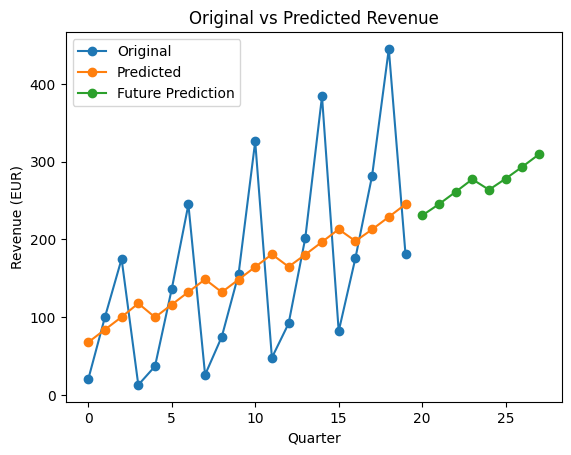

In [25]:
# Use the model for prediction
predicted = model_forcast.predict(x_forcast)                                                                                       # Predict the output
original = y_forcast.values                                                                                                        # Get the original output

# Also attempt to predict the future. You know, just for fun :)
future = pd.DataFrame({'Year': [6, 6, 6, 6, 7, 7, 7, 7], 'Quarter': [1, 2, 3, 4, 1, 2, 3, 4]})                                     # Create a new dataframe (Test Data)
predicted_future = model_forcast.predict(future)                                                                                   # Predict the output

plt.figure()
plt.plot(range(0, len(forcastDemo)), original, 'o-', label='Original')
plt.plot(range(0, len(forcastDemo)), predicted[:, 0], 'o-', label='Predicted')
plt.plot(range(len(forcastDemo), len(forcastDemo) + len(future)), predicted_future, 'o-', label='Future Prediction')
plt.xlabel('Quarter')
plt.ylabel('Revenue (EUR)')
plt.title('Original vs Predicted Revenue')
plt.legend()
plt.show()

### Question 3: Iris
- Load the iris dataset (`../Data/Iris.csv`) and study its contents.
- Determine which columns we cannot use in this prediction? Regression or classification?
- Now create an input data set `x_iris` and normalize it. Try one of the normalization techniques that you have not yet used in an exercise or assignment.
- Create a training data set and a test data set (`x_iris_learning` and `x_iris_validation`) consisting of `80%` and `20%` (randomly chosen) of the input data set `x_iris` respectively.
- Create a neural network with the correct inputs and outputs.
- Evaluate your neural network on your test data set (`x_test_iris`). What accuracy do you achieve?

**Name of Columns**: `sepal length` `sepal width` `petal length` `petal width` `target`

In [13]:
# Load in data and filter data
iris = pd.read_csv('../Data/Iris.csv', delimiter=',', decimal='.')

# Determine how we are going to use the data set
print(colored(f"We can use the 1st 4 columns as input 'sepal length', 'sepal width', 'petal length', 'petal width', for our neural network. The last column is our output 'target'. Obviously this is a classifier. Note this is not a binary classifier because there are three different possibilities.", outputColor))

We can use the 1st 4 columns as input 'sepal length', 'sepal width', 'petal length', 'petal width', for our neural network. The last column is our output 'target'. Obviously this is a classifier. Note this is not a binary classifier because there are three different possibilities.


In [47]:
# Split up the necessary data 
x_iris = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]                                                                       # Get the input
y_iris = iris['target']                                                                                                                             # Get the output


# Split the data in training data and testing data.
x_iris_learning, x_iris_validation, y_iris_learning, y_iris_validation = train_test_split(x_iris, y_iris, test_size=0.2)                            # Split the data
print(colored(f"Splitting the input and output data in learning and validation data respectively 80% and 20%.\n", outputColor))

# Normalize and convert input and output fields
x_iris_learning_normalize = (x_iris_learning - x_iris_learning.min()) / (x_iris_learning.max() - x_iris_learning.min())                             # Normalize the input
x_iris_validation_normalize = (x_iris_validation - x_iris_validation.min()) / (x_iris_validation.max() - x_iris_validation.min())                   # Normalize the input 

                                            
y_iris_learning_replace = y_iris_learning.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2]).values          # Replace the output
y_iris_learning_replace = to_categorical(y_iris_learning_replace)                                                                                   # One-hot encoding

print(colored(f"We need to normalize the inputs and outputs. Obviously the outputs because this is a classifier.", outputColor))

Splitting the input and output data in learning and validation data respectively 80% and 20%.

We need to normalize the inputs and outputs. Obviously the outputs because this is a classifier.


In [61]:
# Create (ANN) artificial neural network
inputs_iris = Input(shape=(4,))
x_iris_model = Dense(8, activation='sigmoid')(inputs_iris)
x_iris_model = Dense(16, activation='sigmoid')(x_iris_model)
x_iris_model = Dense(32, activation='sigmoid')(x_iris_model)
x_iris_model = Dense(16, activation='sigmoid')(x_iris_model)
x_iris_model = Dense(8, activation='sigmoid')(x_iris_model)
outputs_iris = Dense(3, activation='softmax')(x_iris_model)
model_iris = Model(inputs_iris, outputs_iris, name='Iris_NN')                                                               # Softmax for one-hot encoding (classification)

# Compile the model
model_iris.compile(optimizer=Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])   # Categorical_crossentropy for one-hot encoding

# Fit the model
history_iris = model_iris.fit(
                            x_iris_learning_normalize,              # Input
                            y_iris_learning_replace,                # Output
                            epochs=1000,                            # Number of epochs (epochs = iterations over all the dataset)
                            callbacks=[PlotLossesKeras()],          # Plot the losses
                            verbose=False)                          # Fit the model

accuracy
	accuracy         	 (min:    0.125, max:    0.992, cur:    0.992)
Loss
	loss             	 (min:    0.046, max:    1.221, cur:    0.046)


In [64]:
# Get a summary of the model
model_iris.summary()

Model: "Iris_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,259 (16.64 KB)

 Trainable params: 1,419 (5.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,840 (11.10 KB)

In [62]:
# Use the model for prediction
predicted = model_iris.predict(x_iris_validation_normalize)                                                                         # Predict the output
predicted = np.argmax(predicted, axis=1)                                                                                            # Get the highest value
predicted = np.where(predicted == 0, 'Iris-setosa', np.where(predicted == 1, 'Iris-versicolor', 'Iris-virginica'))                  # Replace the output
original = y_iris_validation.values

# Evaluate the model
correct = np.mean(predicted == original)                                                                                            # Get the mean of the correct predictions
print(colored(f"\nThe percentage of Iris that are correctly classified is: {round(correct, 2) * 100}%", outputColor))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

The percentage of Iris that are correctly classified is: 97.0%


In [63]:
# Let's try to predict a new flower
newFlower = pd.DataFrame({'sepal length': [5.9], 'sepal width': [3.0], 'petal length': [5.1], 'petal width': [1.8]})                # New flower
newFlower_normalize = (newFlower - x_iris.min()) / (x_iris.max() - x_iris.min())                                                    # Normalize the new flower
prediction = model_iris.predict(newFlower_normalize)                                                                                # Predict the output
prediction = np.argmax(prediction, axis=1)                                                                                          # Get the highest value
prediction = np.where(prediction == 0, 'Iris-setosa', np.where(prediction == 1, 'Iris-versicolor', 'Iris-virginica'))               # Replace the output
print(colored(f"The prediction for the new flower is: {prediction}", outputColor))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
The prediction for the new flower is: ['Iris-virginica']


## Exercises Meta Heuristics (Week 5-6)

### Question 1: The Backpack
You will find yourself in a **secret room** equipped with a door with a **time lock**. You'll see a timer countdown telling you that you only have five minutes left before the door will be locked forever. In front of you are **valuable objects**, each with their own **yield and weight**. You have a backpack that can carry an absolute maximum weight of `750 grams`. Put together the optimal backpack. You should end up with an optimal yield of `1458` (or at least a value close to that).

$$ \text{Maximize} \sum_{i=1}^{n} v_i \cdot x_i $$

In [102]:
knapsackItems = pd.read_csv('../Data/KnapsackItems.csv', sep=',')

#### 1.1. Simulated Annealing

In [116]:
class TheBackpackProblem(Annealer):
    def energy(self):
        solution = self.state
        total_weight = (solution * items_weight).sum()
        if total_weight > 750:
            total_value = 0
        else:
            total_value = (solution * items_value).sum()
        return -total_value
    
    def move(self):
        idx = np.random.randint(0, len(self.state))
        self.state[idx] = 1 - self.state[idx]


items_weight = knapsackItems['Gewichten(gr)']
items_value = knapsackItems['Waarde']

initial_state = np.random.choice([0, 1], size=len(items_weight))
optimal_solution, optimal_value = TheBackpackProblem(initial_state).anneal()

print(colored(f"Optimal solution: {optimal_solution}\nObjective function value: {optimal_value}", outputColor))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
    2.50000      -1416.00     0.00%     0.00%     0:00:12     0:00:00

Optimal solution: [1 0 1 0 1 0 1 1 1 0 0 0 0 1 1]
Objective function value: -1458


#### 1.2. Genetic Algorithm

Optimal solution: [0 1 1 0 0 1 1 1 1 0 1 0 0 0 1]
Objective function value: 1450


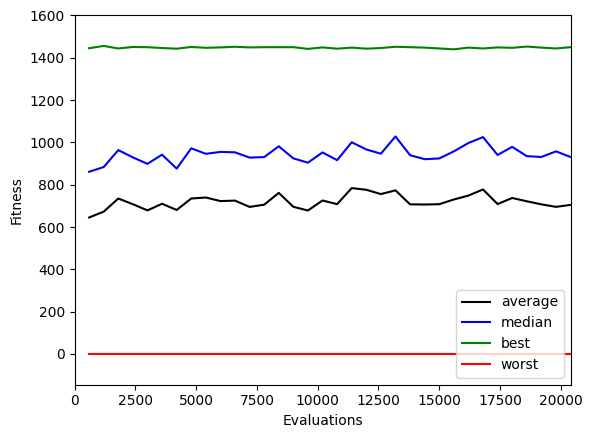

In [118]:
# Function to generate initial population of candidate solutions
def generate(random = None, args = None):
    # Return a random binary array (0s and 1s) of the same length as 'weight_items' column in the dataframe
    return np.random.choice([0,1], size=len(args.get('weight_items'))) 

# Function to evaluate the fitness of each candidate solution
def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:  # Iterate over each candidate solution
        # Calculate total weight of the selected items by multiplying candidate vector with weight_items and summing up
        total_weight = (candidate * args.get('weight_items')).sum()
        
        # If total weight exceeds 750, set total value to 0 (invalid solution)
        if total_weight > 750:
            total_value = 0
        else:
            # Otherwise, calculate total value by multiplying candidate vector with value_items and summing up
            total_value = (candidate * args.get('value_items')).sum()
        # Append the total value to the fitness list
        fitness.append(total_value)
    return fitness

rand = Random()                                                                 # Instantiate a random number generator
ga = ec.GA(rand)                                                                # Create a Genetic Algorithm object with the random generator
ga.terminator = ec.terminators.evaluation_termination                           # Set the termination condition to be based on number of evaluations
ga.variator = [ec.variators.n_point_crossover, ec.variators.bit_flip_mutation]  # Set the variators to use n-point crossover and bit flip mutation for generating new candidates
ga.observer = ec.observers.plot_observer                                        # Set an observer to plot the progress of the algorithm
population = ga.evolve(                                                         # Evolve the population using the specified parameters
    generator = generate,                                                       # Function to generate initial population
    evaluator = evaluate,                                                       # Function to evaluate fitness of candidates
    selector = ec.selectors.fitness_proportionate_selection,                    # Selection method based on fitness proportion
    pop_size = 600,                                                             # Population size of 600 candidates
    maximize = True,                                                            # We aim to maximize the fitness value
    bounder = ec.Bounder(0, 1),                                                 # Candidates are bounded between 0 and 1 (binary)
    max_evaluations = 20000,                                                    # Maximum number of evaluations (termination condition)
    mutation_rate = 0.25,                                                       # Mutation rate of 25%
    weight_items = knapsackItems['Gewichten(gr)'],                              # Weights of items (from dataframe)
    value_items = knapsackItems['Waarde'])                                      # Values of items (from dataframe)
population.sort(reverse=True)                                                   # Sort the population based on fitness in descending order

print(colored(f"Optimal solution: {population[0].candidate}\nObjective function value: {population[0].fitness}", outputColor))

### Question 2: The Gutter
You are responsible for the design of gutters where the production costs must be as low as possible. It is therefore necessary that the gutters have an optimal cross-section with the available material so that leaves and dirt can be easily removed. The company you work for purchases **metal plates** that have a width of `1m. In other words H + W + H` see drawing-must be less than or equal to `1m`. Determine the **ideal `width B` and `height H`** of the gutter that you can make from the `1m` plates.

$$ \text{Maximize} \frac{1}{2} \cdot B \cdot H $$

![Gutter](../W23P4-W24P4/Images/theGutter.png)

#### 2.1. Simulated Annealing

In [86]:
class TheGutterProblem(Annealer):
    def energy(self):
        width  = self.state[0]              # Width = B
        height = (maxMeter - width) / 2     # Height = H
        return -width * height              # Width * Height = Is the area of the gutter
    
    def move(self):
        width = self.state[0]
        width += np.random.normal(0, 0.1)                                   # Get a random number from a normal distribution
        self.state[0] = np.clip(width, minMeter, maxMeter)

minMeter = 0
maxMeter = 1
initial_state = np.random.uniform(minMeter, maxMeter, size=1)
optimal_solution, optimal_value = TheGutterProblem(initial_state).anneal()

print(colored(f"Optimal solution: {optimal_solution}\nObjective function value: {optimal_value}", outputColor))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Route: [0.49999536]
Distance: 0.12499999998922813


#### 2.2. Genetic Algorithm

Optimal solution: [0.49997767]
Objective function value: 0.12499999975067326


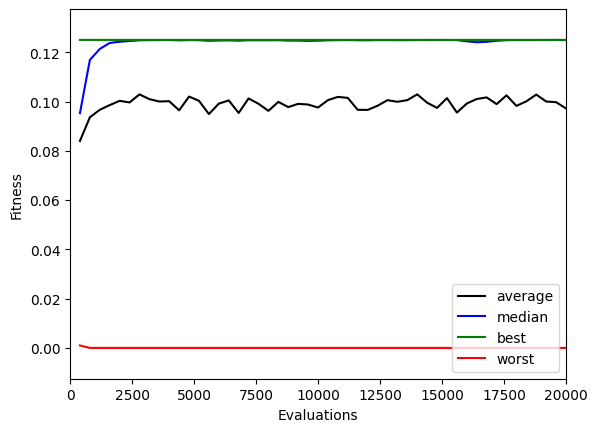

In [133]:
def generate(random = None, args = None):
    return np.random.uniform(low=0, high=1, size=1)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        width  = candidate[0]               # Width = B
        height = (maxMeter - width) / 2     # Height = H
        fitness.append(width * height)     # Width * Height = Is the area of the gutter
    return fitness

minMeter = 0
maxMeter = 1

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator = generate,
    evaluator = evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size = 400,
    maximize = True,
    bounder = ec.Bounder(minMeter, maxMeter),
    max_evaluations = 20000,
    mutation_rate = 0.25)
population.sort(reverse=True)

print(colored(f"Optimal solution: {population[0].candidate}\nObjective function value: {population[0].fitness}", outputColor))

### Question 3: The Football Stadium
The local sports club wants to build a new stadium. The perimeter of the sports field should be `400m`, and at the same time we want to ensure that the central midfield has a maximum surface area. Determine the ideal length and width ratio.

$$ \text{Maximize } L \cdot B $$

![The Football Stadium](../W23P4-W24P4/Images/theFootballStadium.png)

#### 3.1. Simulated Annealing

In [120]:
class TheGutterProblem(Annealer):
    def energy(self):
        length = self.state[0]                  # Length = L
        height = circumference - (length * 2)   # Height = B
        area = length * height
        return -area
    
    def move(self):
        length = self.state[0]
        length += np.random.normal(0, 0.1)                                  # Get a random number from a normal distribution
        self.state[0] = np.clip(length, 0, (circumference / 2))

circumference = 400

initial_state = np.random.uniform(0, (circumference / 2), size=1)
optimal_solution, optimal_value = TheGutterProblem(initial_state).anneal()

print(colored(f"Optimal solution: {optimal_solution}\nObjective function value: {-optimal_value}", outputColor))

length = optimal_solution[0]
height = 200 - length
max_area = length * height

print(colored(f"\nOptimal Length (L): {length:.2f} m", outputColor))
print(colored(f"Optimal Height (B): {height:.2f} m", outputColor))
print(colored(f"Maximum Area: {max_area:.2f} m^2", outputColor))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Optimal solution: [99.99987414]
Objective function value: 19999.999999968317

Optimal Length (L): 100.00 m
Optimal Height (B): 100.00 m
Maximum Area: 10000.00 m^2


#### 3.2. Genetic Algorithm

Optimal solution: [100.00000621]
Objective function value: 19999.999999999924


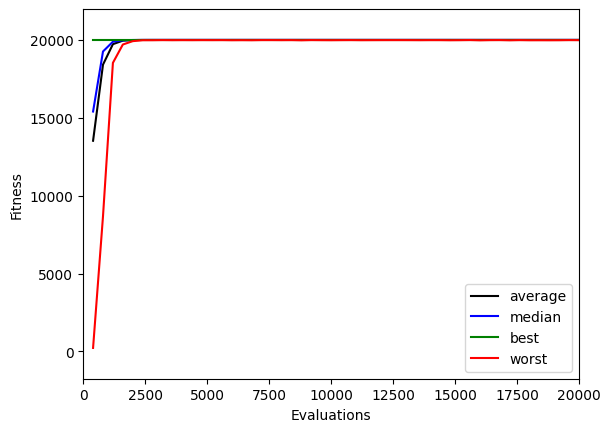

In [138]:
def generate(random = None, args = None):
    return np.random.uniform(low=0, high=args.get('circumference') / 2, size=1)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        length = candidate[0]                               # Length = L
        height = args.get('circumference') - (length * 2)   # Height = B
        area = length * height
        fitness.append(area)
    return fitness

circumference = 400

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator = generate,
    evaluator = evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size = 400,
    maximize = True,
    bounder = ec.Bounder(0, (circumference / 2)),
    max_evaluations = 20000,
    mutation_rate = 0.25,
    circumference=circumference)
population.sort(reverse=True)

print(colored(f"Optimal solution: {population[0].candidate}\nObjective function value: {population[0].fitness}", outputColor))

### Question 4: Optimization problem

Given the following objective function to be maximized:


$ obj = 0.2 + x_1^2 + x_2^2 - 0.1 \cos(6\pi x_1) - 0.1 \cos(6\pi x_2) $


With the following restrictions: $-1.0 \leq x_i \leq 1.0$ met $i=1,2$

Find a good solution.

#### 4.1. Simulated Annealing

In [121]:
class TheGutterProblem(Annealer):
    def energy(self):
        x1 = self.state[0]
        x2 = self.state[1]
        obj = 0.2 + x1**2 + x2**2 - 0.1 * math.cos(6 * math.pi * x1) - 0.1 * math.cos(6 * math.pi * x2)
        return -obj
    
    def move(self):
        idx = np.random.randint(0,2)                                        # Get a random number between 0 and 1
        self.state[idx] += np.random.normal(0, 0.1)
        self.state[idx] = np.clip(self.state[idx], minValue, maxValue)

minValue = -1.0
maxValue = 1.0
initial_state = np.random.uniform(minValue, maxValue, size=2)
optimal_solution, optimal_value = TheGutterProblem(initial_state).anneal()

print(colored(f"Optimal solution: {optimal_solution}\nObjective function value: {-optimal_value}", outputColor))

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


Optimal solution: [1. 1.]
Objective function value: 2.0


#### 4.2. Genetic Algorithm

Optimal solution: [1. 1.]
Objective function value: 2.0


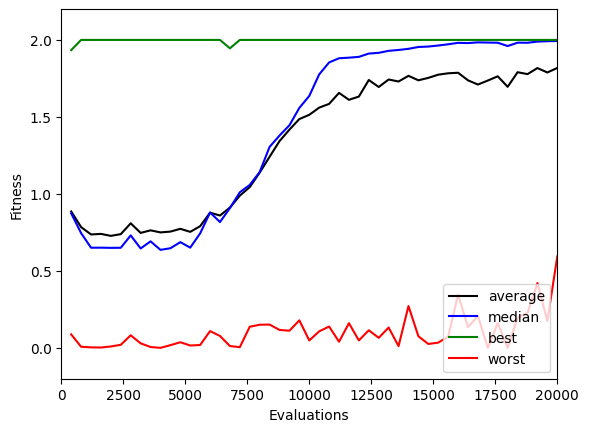

In [140]:
def generate(random = None, args = None):
    return np.random.uniform(low=args.get('minValue'), high=args.get('maxValue'), size=2)

def evaluate(candidates, args = None):
    fitness = []
    for candidate in candidates:
        x1 = candidate[0]
        x2 = candidate[1]
        obj = 0.2 + x1**2 + x2**2 - 0.1 * math.cos(6 * math.pi * x1) - 0.1 * math.cos(6 * math.pi * x2)
        fitness.append(obj)
    return fitness

minValue = -1.0
maxValue = 1.0

rand = Random()
ga = ec.GA(rand)
ga.terminator = ec.terminators.evaluation_termination
ga.variator = [ec.variators.arithmetic_crossover, ec.variators.gaussian_mutation]
ga.observer = ec.observers.plot_observer
population = ga.evolve(
    generator = generate,
    evaluator = evaluate,
    selector = ec.selectors.fitness_proportionate_selection,
    pop_size = 400,
    maximize = True,
    bounder = ec.Bounder(minValue, maxValue),
    max_evaluations = 20000,
    mutation_rate = 0.25,
    minValue=minValue,
    maxValue=maxValue)
population.sort(reverse=True)

print(colored(f"Optimal solution: {population[0].candidate}\nObjective function value: {population[0].fitness}", outputColor))

### Question 5: Quiz

1. Do above-average chromosomes always produce better offspring? 
2. Can you explore the entire search space with crossover? Are there any limitations to this exploration?
3. Why does the chance of mutation play an important role?
4. Why is it best to start with a randomized vector for Simulated Annealing?
5. Why does the temperature have to decrease during simulated annealing?

In [141]:
answers = ['No, above-average chromosomes do not always produce better offspring.',
           'No, crossover cannot explore the entire search space. It is limited by the initial population and the selection process.',
           'The chance of mutation plays an important role because it introduces new genetic material into the population, which can help avoid local optima.',
           'It is best to start with a randomized vector for Simulated Annealing to ensure that the algorithm explores the solution space effectively and does not get stuck in local optima.',
           'The temperature has to decrease during simulated annealing to allow the algorithm to escape local optima and find the global optimum.']

color = ['red', 'green', 'blue', 'yellow', 'magenta']

for i in range(len(answers)):
    print(f"{i + 1}. " + colored(f"{answers[i]}", color[i]))

1. No, above-average chromosomes do not always produce better offspring.
2. No, crossover cannot explore the entire search space. It is limited by the initial population and the selection process.
3. The chance of mutation plays an important role because it introduces new genetic material into the population, which can help avoid local optima.
4. It is best to start with a randomized vector for Simulated Annealing to ensure that the algorithm explores the solution space effectively and does not get stuck in local optima.
5. The temperature has to decrease during simulated annealing to allow the algorithm to escape local optima and find the global optimum.
